In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# Objective

##### 
The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

# Data exploration

In [2]:
train=pd.read_csv('datasets/AMZN_train.csv',index_col=0)
val=pd.read_csv('datasets/AMZN_val.csv',index_col=0)
test=pd.read_csv('datasets/AMZN_test.csv',index_col=0)

In [3]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200


In [4]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    dataframe.set_index(pd.to_datetime(dataframe.index),inplace=True)
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    #print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(y=["Close", "Open", "High", "Low"],figsize=(20,10))
    

Shape (4781, 6) 

Columns Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4781 entries, 1997-05-15 to 2016-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4781 non-null   float64
 1   High       4781 non-null   float64
 2   Low        4781 non-null   float64
 3   Close      4781 non-null   float64
 4   Adj Close  4781 non-null   float64
 5   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.5 KB

               Open         High          Low        Close    Adj Close  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    127.619845   129.480122   125.697925   127.662449   127.662449   
std     145.693083   147.132537   144.053633   145.677581   145.677581   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      34.299999    34.

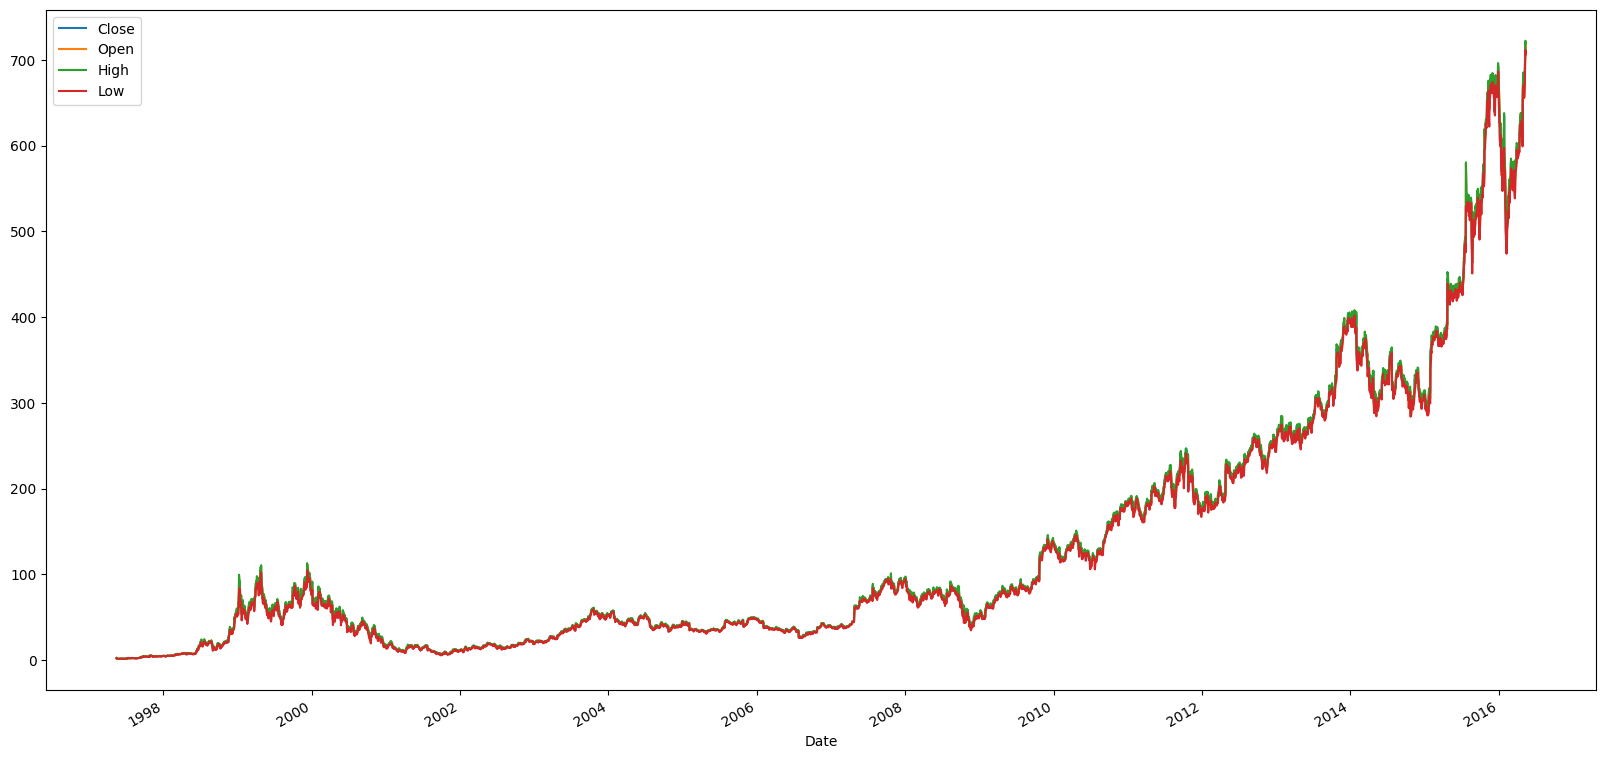

In [5]:
analyse(train)

Shape (503, 6) 

Columns Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2016-05-16 to 2018-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   691.359985   
25%     780.500000   785.625

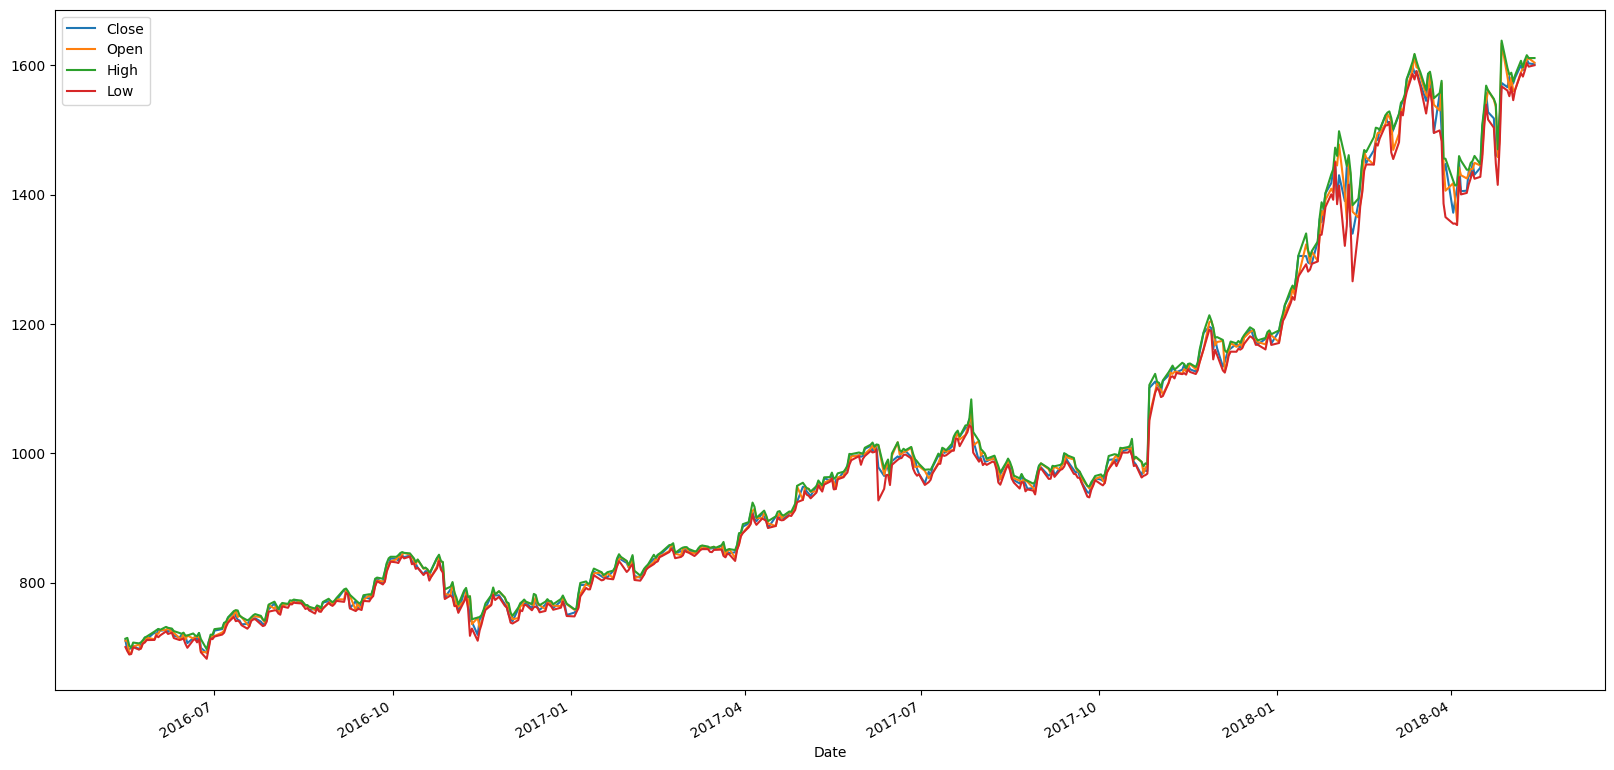

In [6]:
analyse(val)

Shape (504, 6) 

Columns Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2018-05-15 to 2020-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  1343.959961   
25%    1712.924988  1730.602

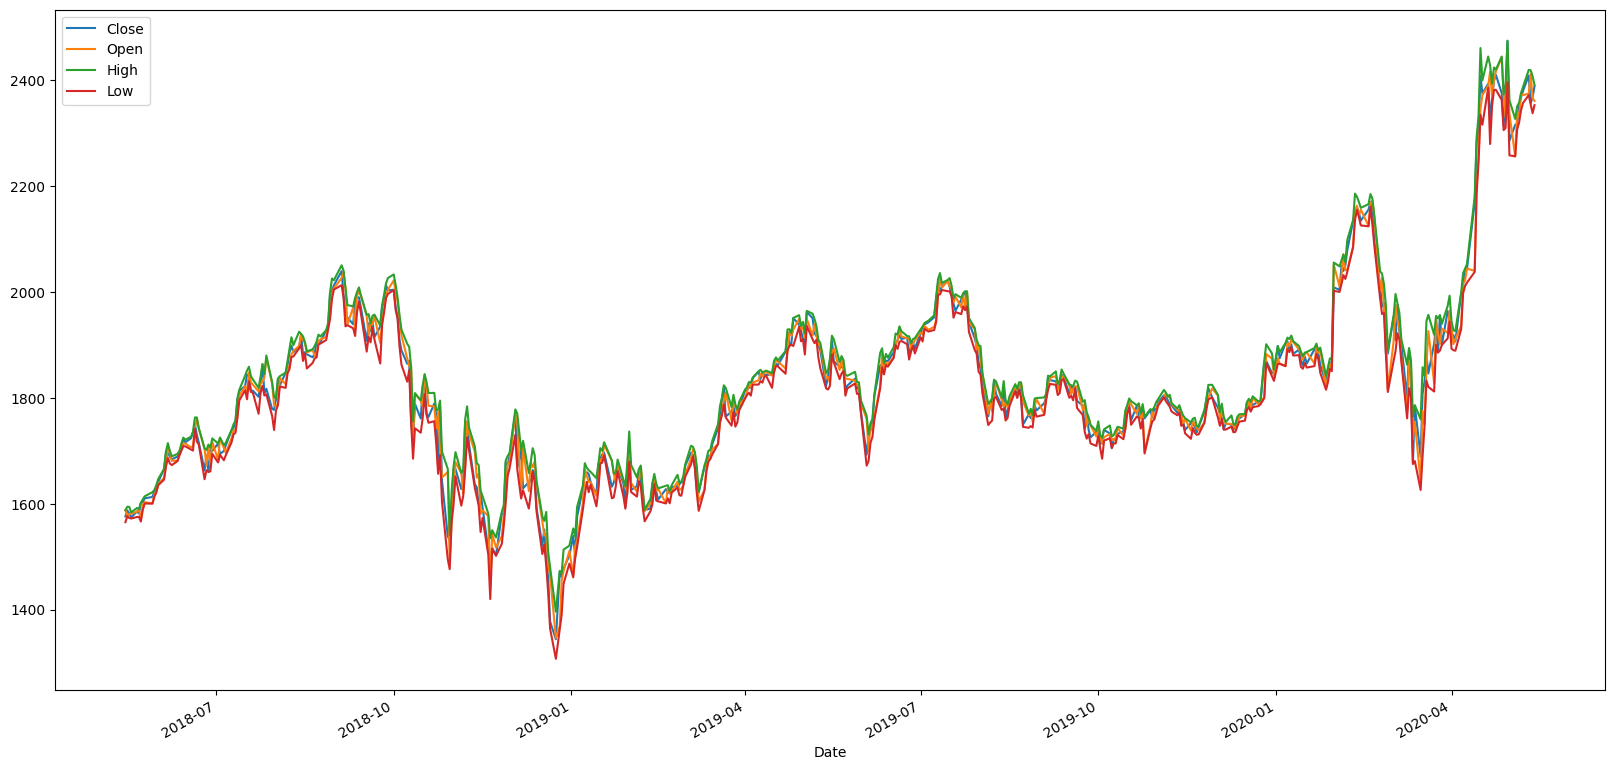

In [7]:
analyse(test)

# Feature Engineering

In [8]:
def data_engeering(df):
    df['Target']=((df.shift(-1)['Close']-df.shift(-1)['Open']))
    df['today_open_change']=df['Open']-df.shift()['Open']
    df['today_high_change']=df['High']-df.shift()['High']
    df['today_low_change']=df['Low']-df.shift()['Low']
    df['today_close_change']=df['Close']-df.shift()['Close']
    df['today_volumn_change']=df['Volume']-df.shift()['Volume']
    df['3day_trend']=(df['Close']-df['Open']).rolling(3).mean()
    df['7day_trend']=(df['Close']-df['Open']).rolling(7).mean()
    df['Today Direction']=df['Close']-df['Open']
    df['Price Range']=df['High']-df['Low']
    df.dropna(inplace=True)
    df['Target']=(df['Target']>0).astype(int)
    print(df.info())

In [9]:
data_engeering(train)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4774 entries, 1997-05-23 to 2016-05-12
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 4774 non-null   float64
 1   High                 4774 non-null   float64
 2   Low                  4774 non-null   float64
 3   Close                4774 non-null   float64
 4   Adj Close            4774 non-null   float64
 5   Volume               4774 non-null   int64  
 6   Target               4774 non-null   int64  
 7   today_open_change    4774 non-null   float64
 8   today_high_change    4774 non-null   float64
 9   today_low_change     4774 non-null   float64
 10  today_close_change   4774 non-null   float64
 11  today_volumn_change  4774 non-null   float64
 12  3day_trend           4774 non-null   float64
 13  7day_trend           4774 non-null   float64
 14  Today Direction      4774 non-null   float64
 15  Price Range         

In [10]:
data_engeering(val)
data_engeering(test)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2016-05-24 to 2018-05-11
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 496 non-null    float64
 1   High                 496 non-null    float64
 2   Low                  496 non-null    float64
 3   Close                496 non-null    float64
 4   Adj Close            496 non-null    float64
 5   Volume               496 non-null    int64  
 6   Target               496 non-null    int64  
 7   today_open_change    496 non-null    float64
 8   today_high_change    496 non-null    float64
 9   today_low_change     496 non-null    float64
 10  today_close_change   496 non-null    float64
 11  today_volumn_change  496 non-null    float64
 12  3day_trend           496 non-null    float64
 13  7day_trend           496 non-null    float64
 14  Today Direction      496 non-null    float64
 15  Price Range          

# Classical Machine Learning Algorithms

### Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, roc_curve
#import scikitplot as skplt

In [14]:
input_col=['Open','High','Low','Close','Volume','3day_trend','7day_trend','today_open_change','today_close_change','today_high_change',	'today_low_change']
sol_col=["Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today Direction",
    "Price Range",
    "3day_trend",
    "7day_trend"]

In [15]:
sc = StandardScaler()
# update the cols with their normalized values
train[input_col] = sc.fit_transform(train[input_col])
val[input_col] = sc.transform(val[input_col])
test[input_col] = sc.transform(test[input_col])

In [16]:
sc = StandardScaler()
# update the cols with their normalized values
train[sol_col] = sc.fit_transform(train[sol_col])
val[sol_col] = sc.transform(val[sol_col])
test[sol_col] = sc.transform(test[sol_col])




In [17]:
test

,Open,High,Low,Close,Adj Close,Volume,Target,today_open_change,today_high_change,today_low_change,today_close_change,today_volumn_change,3day_trend,7day_trend,Today Direction,Price Range
Date,,,,,,,,,,,,,,,,
2018-05-23,9.922390,10.022235,10.015938,10.134707,10.134707,-0.624950,1,-4.241226,2.887390,-2.241934,4.646541,1246300.0,3.952855,1.748668,9.250346,7.947560
2018-05-24,10.107859,10.065664,10.169173,10.143025,10.143025,-0.616171,1,5.992235,1.521751,5.417805,0.242480,68100.0,4.752141,3.719196,1.502143,4.025769
2018-05-25,10.142025,10.105689,10.253090,10.191700,10.191700,-0.710480,1,1.076503,1.399600,2.950337,1.585459,-731600.0,7.481610,3.409238,2.136583,2.475603
2018-05-29,10.126282,10.157899,10.251005,10.210400,10.210400,-0.562481,1,-0.544953,1.836910,-0.111045,0.587943,1148100.0,4.226861,4.700936,3.642929,4.471548
2018-05-30,10.245827,10.186556,10.339859,10.293036,10.293036,-0.683538,1,3.850405,0.991605,3.126074,2.715631,-939100.0,4.532289,6.321439,2.028347,2.325319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-07,15.447503,15.291804,15.416493,15.399161,15.399161,-0.620503,1,10.092795,4.494916,5.682633,3.706276,278600.0,-1.340234,11.535362,-2.168958,7.288890
2020-05-08,15.429354,15.368315,15.513064,15.481659,15.481659,-0.644969,1,-0.623144,2.709055,3.400750,2.711051,-189800.0,3.837752,7.383369,2.232854,6.625266
2020-05-11,15.446953,15.589065,15.618118,15.683712,15.683712,-0.638189,0,0.538272,7.885798,3.702737,6.689552,52600.0,6.015737,5.042790,10.299709,10.962724


In [18]:
model=LogisticRegression()
model.fit(train[sol_col],train['Target'])

LogisticRegression()

In [19]:
y_val=model.predict(val[sol_col])
accuracy = accuracy_score(val['Target'], y_val)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_val)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.4596774193548387
Confusion Matrix:
[[ 74 178]
 [ 90 154]]


In [20]:
y_test=model.predict(test[sol_col])
accuracy = accuracy_score(test['Target'], y_test)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(test['Target'], y_test)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.49899396378269617
Confusion Matrix:
[[108 138]
 [111 140]]


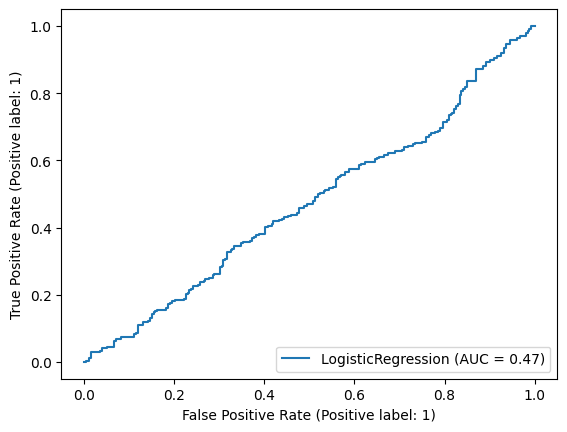

In [21]:
RocCurveDisplay.from_estimator(model,val[sol_col],val['Target'])

### Decision tree

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [23]:
model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
model.fit(train[sol_col], train['Target'])


DecisionTreeClassifier(random_state=42)

In [24]:
y_val = model.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_val)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_val)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5241935483870968
Confusion Matrix:
[[208  44]
 [192  52]]


In [25]:
y_test = model.predict(test[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(test['Target'], y_test)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(test['Target'], y_test)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5211267605633803
Confusion Matrix:
[[186  60]
 [178  73]]


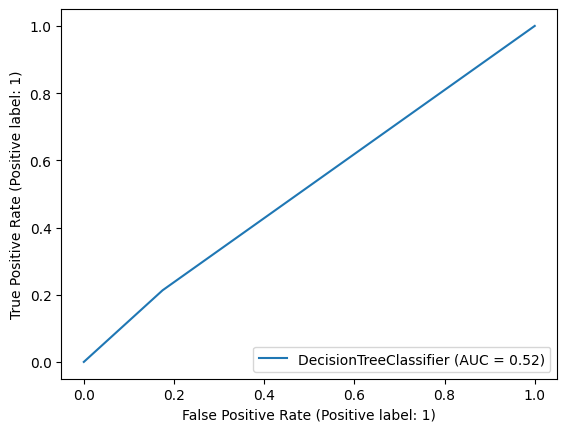

In [26]:
RocCurveDisplay.from_estimator(model,val[sol_col],val['Target'])

### Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Create the random forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(train[sol_col], train['Target'])

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions on the test data
y_pred = model.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5120967741935484
Confusion Matrix:
[[222  30]
 [212  32]]


In [30]:
# Make predictions on the test data
y_pred = model.predict(test[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(test['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(test['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5231388329979879
Confusion Matrix:
[[179  67]
 [170  81]]


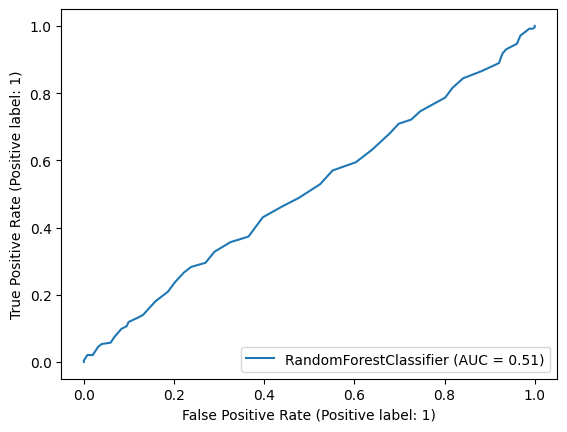

In [31]:
RocCurveDisplay.from_estimator(model,val[sol_col],val['Target'])

###  Gradient boosting ensemble

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Create the random forest classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model using the training data
model.fit(train[sol_col], train['Target'])

GradientBoostingClassifier(random_state=42)

In [34]:
# Make predictions on the test data
y_pred = model.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5181451612903226
Confusion Matrix:
[[229  23]
 [216  28]]


In [35]:
# Make predictions on the test data
y_pred_train = model.predict(train[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(train['Target'], y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.6734394637620444


In [36]:
# Assuming your classifier is named clf
params = model.get_params()

# Display the hyperparameters
for key, value in params.items():
    print(f"{key}: {value}")

ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: log_loss
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [37]:
# Create the random forest classifier
model = GradientBoostingClassifier(#ccp_alpha=0.00001,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   subsample=1,
                                   tol= 0.5,
                                   learning_rate=0.1, 
                                   max_depth=3,
                                   n_estimators=500, 
                                  # n_iter_no_change=3,
                                   validation_fraction=.2,
                                   random_state=42
                                   )

# Train the model using the training data
model.fit(train[sol_col], train['Target'])

# Make predictions on the test data
y_pred_train = model.predict(train[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(train['Target'], y_pred_train)
print("Accuracy:", accuracy)


Accuracy: 0.8496020108923334


In [38]:
# Calculate accuracy score
accuracy = accuracy_score(train['Target'], y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.8496020108923334


In [39]:
# Make predictions on the test data
y_pred = model.predict(test[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(test['Target'], y_pred)
print("Accuracy test:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(test['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions on the test data
y_val = model.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_val)
print("Accuracy val:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_val)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy test: 0.5472837022132797
Confusion Matrix:
[[183  63]
 [162  89]]
Accuracy val: 0.5463709677419355
Confusion Matrix:
[[210  42]
 [183  61]]


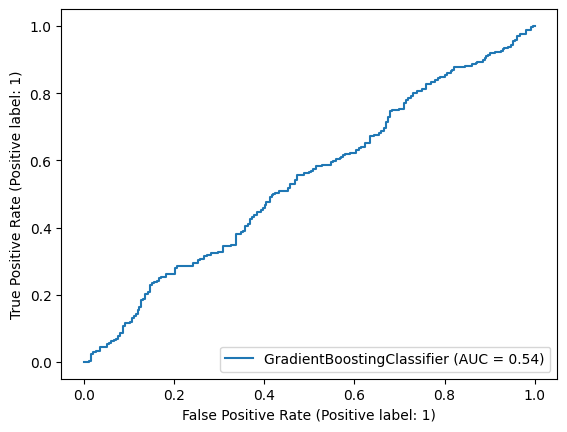

In [40]:
RocCurveDisplay.from_estimator(model,val[sol_col],val['Target'])

### XGBoost

In [42]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [43]:
model_xg = xgb.XGBClassifier(    
                                   learning_rate=0.1, 
                                   max_depth=3,
                                   n_estimators=100,
                                   reg_alpha=0.1,
                                   reg_lambda=0.1,
                                   random_state=42
                                   )

# Train the model using the training data
model.fit(train[sol_col], train['Target'])

# Make predictions on the test data
y_pred_train = model.predict(train[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(train['Target'], y_pred_train)
print("Accuracy:", accuracy)

model_xg.fit(train[sol_col], train['Target'])
# Make predictions on the test data
y_pred_train = model_xg.predict(train[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(train['Target'], y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.8496020108923334
Accuracy: 0.6694595726853791


In [44]:
# Assuming your classifier is named clf
params = model_xg.get_params()

# Display the hyperparameters
for key, value in params.items():
    print(f"{key}: {value}")

objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.1
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 3
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 100
n_jobs: None
num_parallel_tree: None
random_state: 42
reg_alpha: 0.1
reg_lambda: 0.1
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None


In [45]:
# Make predictions on the test data
y_pred = model_xg.predict(test[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(test['Target'], y_pred)
print("Accuracy test:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(test['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Make predictions on the test data
y_val = model_xg.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_val)
print("Accuracy val:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_val)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy test: 0.4788732394366197
Confusion Matrix:
[[203  43]
 [216  35]]
Accuracy val: 0.5161290322580645
Confusion Matrix:
[[230  22]
 [218  26]]


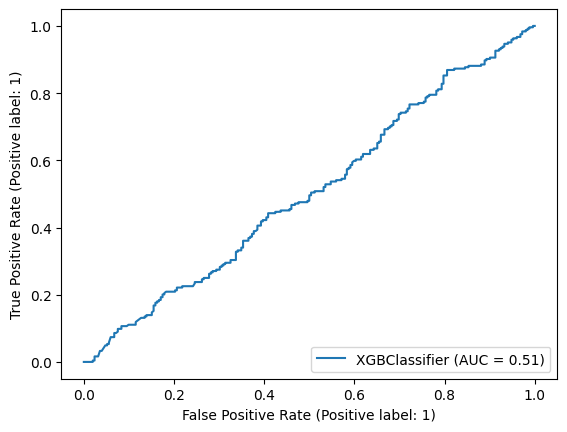

In [46]:
RocCurveDisplay.from_estimator(model_xg,val[sol_col],val['Target'])

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100,200, 300],
    'learning_rate': [ 0.001,0.01, 0.05,0.1],
    'max_depth': [3, 5,10],
 #   'min_samples_split': [1,2, 3,10,20],
 #   'min_samples_leaf': [1, 2],
 #  'max_features': [None, 'sqrt', 'log2']
    "reg_lambda":[0.01,0.001,0.1],
    "reg_alpha":[0.01,0.001,0.1]
}

# Create the base model
gbm = xgb.XGBClassifier(random_state=42)

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train[sol_col],  train['Target'])

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_gbm = xgb.XGBClassifier(**best_params, random_state=42)
best_gbm.fit(train[sol_col],  train['Target'])

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
best_params

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01}

In [51]:
# Make predictions on the test data
y_pred =best_gbm.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.4838709677419355
Confusion Matrix:
[[205  47]
 [209  35]]


### GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [1000, 1500, 200],
    'learning_rate': [ 0.1, 0.04,.01],
    'max_depth': [3, 5,10],
  #  'min_samples_split': [1,2, 3],
  #  'min_samples_leaf': [1, 2],
   # 'tol':[0.1,0.01,0.5],
   # 'validation_fraction':[0.2]
 #  'max_features': [None, 'sqrt', 'log2']
}

# Create the base model
gbm = GradientBoostingClassifier(random_state=42)

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train[sol_col],  train['Target'])

# Get the best parameters
best_params = grid_search.best_params_

# Train the model using the best parameters
best_gbm = GradientBoostingClassifier(**best_params, random_state=42)
best_gbm.fit(train[sol_col],  train['Target'])

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/Users/qingyunwang/Dropbox/job/stratscratchProject/predictionStockprice/Amazon_price_prediction/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/qingyunwang/Dropbox/job/stratscratchProject/predictionStockprice/Amazon_price_prediction/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qingyunwang/Dropbox/job/stratscratchProject/predictionStockprice/Amazon_price_prediction/lib/python3.9/site-packages/sklearn/base.

GradientBoostingClassifier(learning_rate=0.04, max_depth=10, n_estimators=1000,
                           random_state=42)

In [59]:
# Make predictions on the test data
y_pred =best_gbm.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.49798387096774194
Confusion Matrix:
[[173  79]
 [170  74]]


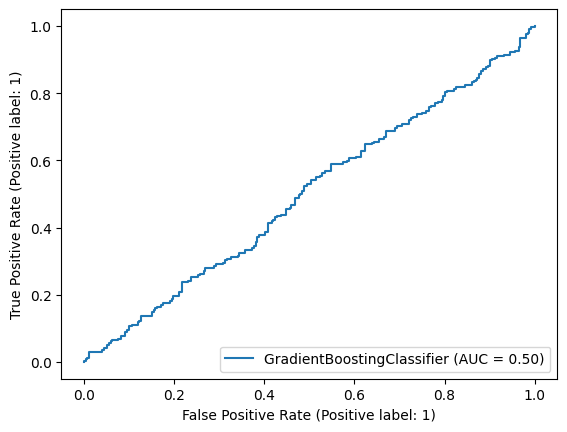

In [60]:
RocCurveDisplay.from_estimator(best_gbm,val[sol_col],val['Target'])

In [61]:
best_params

{'learning_rate': 0.04,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [62]:
# Make predictions on the test data
y_pred =best_gbm.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.49798387096774194
Confusion Matrix:
[[173  79]
 [170  74]]


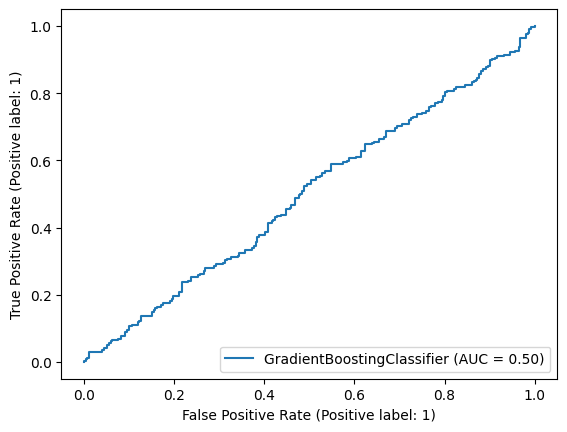

In [63]:
RocCurveDisplay.from_estimator(best_gbm,val[sol_col],val['Target'])

In [64]:
best_params

{'learning_rate': 0.04,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [65]:
# Make predictions on the test data
y_pred =best_gbm.predict(val[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(val['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(val['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.49798387096774194
Confusion Matrix:
[[173  79]
 [170  74]]


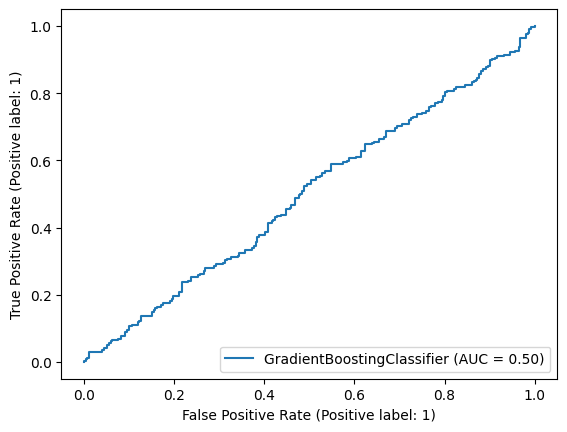

In [66]:
RocCurveDisplay.from_estimator(best_gbm,val[sol_col],val['Target'])

In [67]:
# Make predictions on the test data
y_pred =best_gbm.predict(test[sol_col])

# Calculate accuracy score
accuracy = accuracy_score(test['Target'], y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(test['Target'], y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5030181086519114
Confusion Matrix:
[[137 109]
 [138 113]]


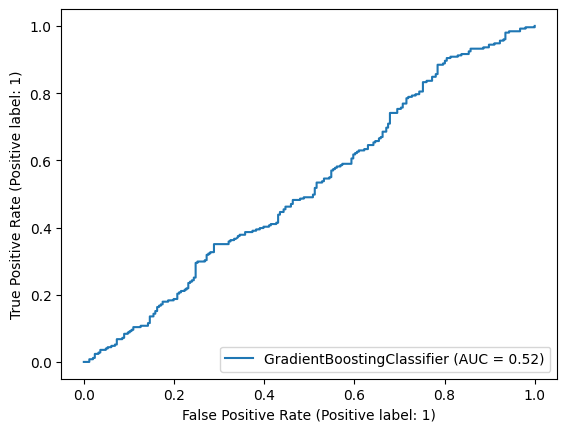

In [68]:
RocCurveDisplay.from_estimator(best_gbm,test[sol_col],test['Target'])

# Deep Learning Algorithm

#### DNN

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta


2023-12-16 16:22:15.002077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
model = tf.keras.Sequential([
  #  tf.keras.layers.LSTM(32, activation='relu', input_shape=(train[sol_col].shape[1],1)),
   # tf.keras.layers.Dense(128, activation='relu'),
   # tf.keras.layers.Dense(64, activation='relu'),
   # tf.keras.layers.Dropout(0.2),
   # tf.keras.layers.Dense(32, activation='relu'),
   # tf.keras.layers.Dense(32, activation='relu'),
   # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['Accuracy'])

In [72]:
# Define the learning rate scheduler callback
def lr_schedule(epoch):
    # You can implement any custom learning rate schedule here
    # For example, reducing the learning rate by half every 10 epochs
    if epoch % 10 == 0 and epoch > 0:
        lr = model.optimizer.lr.numpy()
        lr /= 2.0
        model.optimizer.lr.assign(lr)
    return model.optimizer.lr.numpy()

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [73]:
history = model.fit(train[sol_col], train['Target'], epochs=40, batch_size=16,validation_data=(val[sol_col], val['Target']), callbacks=[lr_scheduler, early_stopping])


Epoch 1/40


299/299 [==============================] - 1s 2ms/step - loss: 0.7077 - Accuracy: 0.4933 - val_loss: 0.7694 - val_Accuracy: 0.4738 - lr: 0.0100
Epoch 2/40
299/299 [==============================] - 0s 1ms/step - loss: 0.6993 - Accuracy: 0.5069 - val_loss: 0.7516 - val_Accuracy: 0.4859 - lr: 0.0100
Epoch 3/40
299/299 [==============================] - 0s 1ms/step - loss: 0.6985 - Accuracy: 0.4996 - val_loss: 0.7365 - val_Accuracy: 0.4919 - lr: 0.0100
Epoch 4/40
299/299 [==============================] - 0s 1ms/step - loss: 0.6969 - Accuracy: 0.5042 - val_loss: 0.7223 - val_Accuracy: 0.4698 - lr: 0.0100
Epoch 5/40
299/299 [==============================] - 0s 1ms/step - loss: 0.6961 - Accuracy: 0.5132 - val_loss: 0.7253 - val_Accuracy: 0.4960 - lr: 0.0100
Epoch 6/40
299/299 [==============================] - 0s 1ms/step - loss: 0.6955 - Accuracy: 0.5109 - val_loss: 0.7217 - val_Accuracy: 0.4960 - lr: 0.0100
Epoch 7/40
299/299 [==============================] - 0s 1ms/step - loss: 0.6937 

In [74]:
test_loss, test_accuracy = model.evaluate(val[sol_col], val['Target'])
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 0s 2ms/step - loss: 0.7150 - Accuracy: 0.5020
Test Loss: 0.7149712443351746
Test Accuracy: 0.5020161271095276


In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


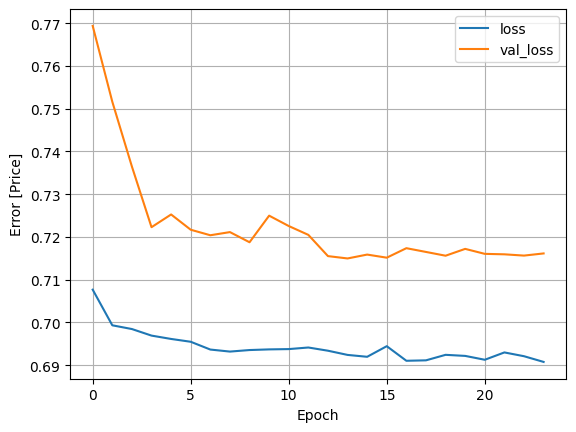

In [76]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

#### LSTM+DNN

In [77]:
from numpy.lib.stride_tricks import sliding_window_view

new_train = sliding_window_view(train[sol_col], (30, 10)).squeeze(axis=1)
new_train_target=train['Target'][29:]

new_val = sliding_window_view(val[sol_col], (30, 10)).squeeze(axis=1)
new_val_target=val['Target'][29:]

new_test = sliding_window_view(test[sol_col], (30, 10)).squeeze(axis=1)
new_test_target=test['Target'][29:]


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
  #  tf.keras.layers.LSTM(32, activation='relu', input_shape=(train[sol_col].shape[1],1)),
  #  tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(None,10)),

 #   tf.keras.layers.Dropout(0.1),
 #   tf.keras.layers.LSTM(units=50),
 #   tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(units=32, return_sequences=True, input_shape=(30,10)),
     tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(units=32),
     tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(36, activation='relu'),
     tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
#model.summary()


In [79]:
history = model.fit(new_train, new_train_target, epochs=20, batch_size=16,validation_data=(new_val, new_val_target), callbacks=[lr_scheduler, early_stopping])


Epoch 1/20


297/297 [==============================] - 8s 15ms/step - loss: 0.6958 - accuracy: 0.5003 - val_loss: 0.6926 - val_accuracy: 0.5161 - lr: 0.0100
Epoch 2/20
297/297 [==============================] - 4s 13ms/step - loss: 0.6938 - accuracy: 0.4889 - val_loss: 0.6931 - val_accuracy: 0.5161 - lr: 0.0100
Epoch 3/20
297/297 [==============================] - 4s 12ms/step - loss: 0.6934 - accuracy: 0.4936 - val_loss: 0.6926 - val_accuracy: 0.5161 - lr: 0.0100
Epoch 4/20
297/297 [==============================] - 4s 12ms/step - loss: 0.6937 - accuracy: 0.4913 - val_loss: 0.6935 - val_accuracy: 0.4839 - lr: 0.0100
Epoch 5/20
297/297 [==============================] - 4s 12ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6928 - val_accuracy: 0.5161 - lr: 0.0100
Epoch 6/20
297/297 [==============================] - 4s 12ms/step - loss: 0.6935 - accuracy: 0.4921 - val_loss: 0.6945 - val_accuracy: 0.4839 - lr: 0.0100
Epoch 7/20
297/297 [==============================] - 4s 12ms/step - loss: 

In [80]:
test_loss, test_accuracy = model.evaluate(new_val, new_val_target)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

 1/15 [=>............................] - ETA: 0s - loss: 0.6895 - accuracy: 0.5625

15/15 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5161
Test Loss: 0.6926283836364746
Test Accuracy: 0.516059935092926


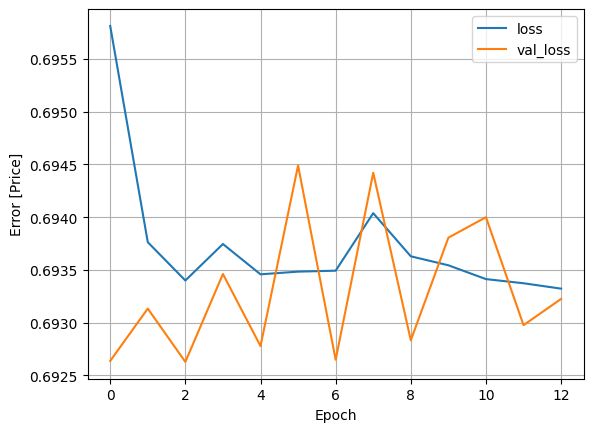

In [81]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

# Arima

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

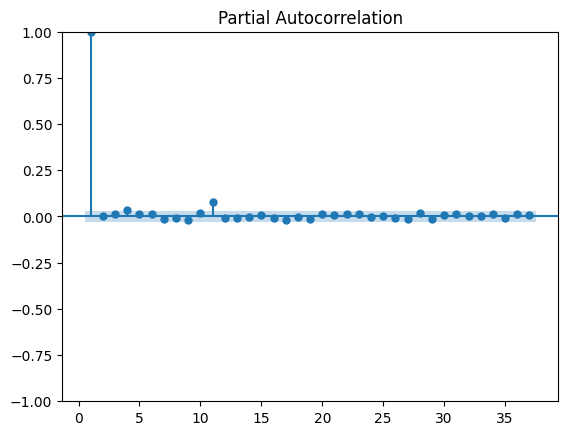

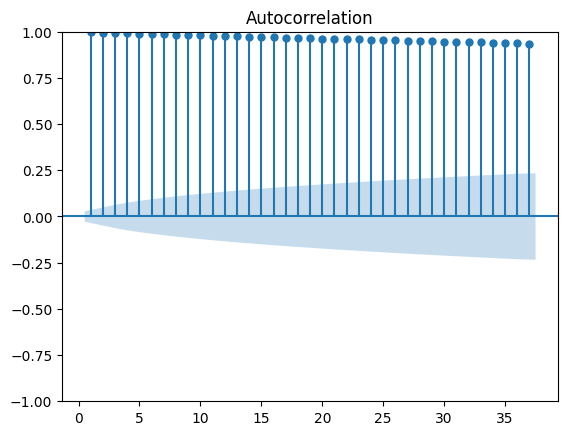

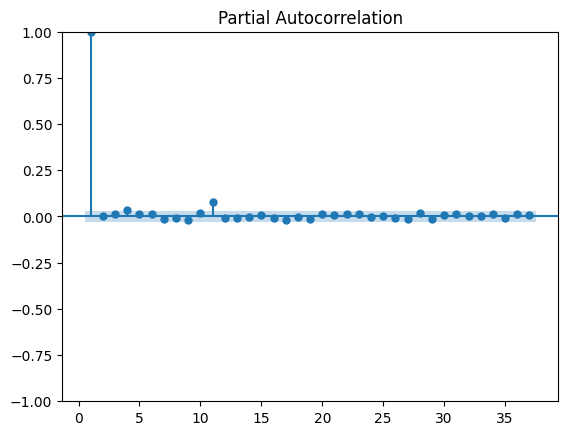

In [124]:
plot_acf(train['Close'],zero=False)
plot_pacf(train['Close'],zero=False)

#### Use close price series

In [125]:
auto=pm.auto_arima(train['Close'])
auto

ARIMA(order=(5, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [155]:
model_predictions=[]
train_list=train['Close']
n_val=len(val)
for i in range(n_val):
    model=ARIMA(train_list,order=(5,2,0))
    model_fit=model.fit()
    model_predictions.append(model_fit.forecast().values)
    train_list.loc[val.index[i]]=val['Close'].iloc[i]
 #   train_list[val.index[i]]=float(model_predictions[i])

/Users/qingyunwang/Dropbox/job/stratscratchProject/predictionStockprice/Amazon_price_prediction/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/Dropbox/job/stratscratchProject/predictionStockprice/Amazon_price_prediction/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/Dropbox/job/stratscratchProject/predictionStockprice/Amazon_price_prediction/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

In [156]:
train_list

Date
1997-05-23    -0.867604
1997-05-27    -0.867031
1997-05-28    -0.867389
1997-05-29    -0.867569
1997-05-30    -0.867604
                ...    
2018-05-07    10.122882
2018-05-08    10.069602
2018-05-09    10.176919
2018-05-10    10.184343
2018-05-11    10.141926
Name: Close, Length: 5270, dtype: float64

In [157]:
for i in range(len(model_predictions)):
    model_predictions[i]=float(model_predictions[i])

/var/folders/pm/r6_hpq8j4hq4ppcc7_7yt1nh0000gn/T/ipykernel_54566/2648290670.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_predictions[i]=float(model_predictions[i])


In [158]:
val['prediction']=model_predictions

In [159]:
val

,Open,High,Low,Close,Adj Close,Volume,Target,today_open_change,today_high_change,today_low_change,today_close_change,today_volumn_change,3day_trend,7day_trend,Today Direction,Price Range,prediction
Date,,,,,,,,,,,,,,,,,
2016-05-24,3.920815,3.934329,3.978736,3.963386,3.963386,-0.667244,1,-1.427138,0.329557,0.354217,1.670094,438700.0,0.054133,0.069252,1.847936,1.431286,4.112506
2016-05-25,3.989489,3.957200,4.031020,3.991917,3.991917,-0.637093,1,2.197678,0.783955,1.824290,0.915101,233900.0,-0.190197,0.048039,0.092030,0.389475,4.009028
2016-05-26,3.991758,3.985381,4.043326,4.037016,4.037016,-0.742926,0,0.040212,0.974517,0.401224,1.466474,-821000.0,2.267013,2.547734,1.965182,0.983016,4.034751
2016-05-27,4.037610,3.996272,4.069815,4.018660,4.018660,-0.768385,1,1.456185,0.353981,0.906108,-0.645183,-197500.0,0.705072,1.292578,-0.843041,0.429553,4.080857
2016-05-31,4.019255,4.048210,4.071345,4.091191,4.091191,-0.591898,0,-0.629810,1.827128,0.017638,2.379314,1369100.0,2.469450,1.742777,3.131773,2.285256,4.031171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-07,10.048121,10.056882,10.165349,10.122882,10.122882,-0.568231,0,5.972142,5.349943,6.308752,4.356011,358300.0,7.197165,-3.409809,3.234026,3.840451,10.075826
2018-05-08,10.087030,9.988336,10.128362,10.069602,10.069602,-0.662849,1,1.230622,-2.497003,-1.353434,-1.807402,-734000.0,4.635249,3.517698,-0.797933,2.650894,10.158783
2018-05-09,10.121402,10.064030,10.194341,10.176919,10.176919,-0.589449,1,1.083210,2.679740,2.311832,3.536952,569400.0,2.802807,6.389819,2.392143,3.059101,10.096770


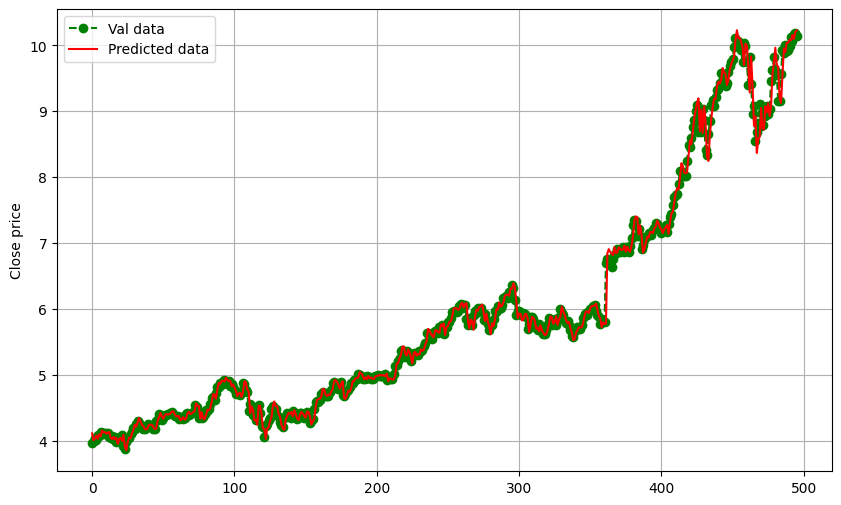

In [160]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel('Close price')
#plt.plot(trainS,'green',label='Train data',marker='o',linestyle='dashed')
plt.plot(val['Close'].values,'green',label='Val data',marker='o',linestyle='dashed')
#plt.plot(train_df['prediction'],'red',label='Test data')
plt.plot(val['prediction'].values,'red',label='Predicted data')

plt.legend()

In [161]:
val['predict_direction']=(val['prediction']-val['Open']).shift(-1)

In [162]:
val.dropna(inplace=True)

In [163]:
(val['predict_direction']>0).astype(int)

Date
2016-05-24    1
2016-05-25    1
2016-05-26    1
2016-05-27    1
2016-05-31    1
             ..
2018-05-04    1
2018-05-07    1
2018-05-08    0
2018-05-09    1
2018-05-10    1
Name: predict_direction, Length: 495, dtype: int64

In [164]:
val['predict_direction']=(val['predict_direction']>0).astype(int)

In [169]:
val['acc']=(val["Target"]==val['predict_direction'])

In [171]:
val['acc'].mean()

0.5151515151515151

#### Use target series

In [29]:
val['target']=((val.shift(-1)['Close']-val.shift(-1)['Open']))
val.dropna(inplace=True)

In [30]:
train 

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,-0.239583
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,-0.052084
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,-0.093750
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,-0.208334
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,-0.041667
...,...,...,...,...,...,...,...
2016-05-06,656.049988,676.950012,656.010010,673.950012,673.950012,4365300,5.799988
2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,9.070007
2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,7.440002


In [31]:
auto=pm.auto_arima(train['target'])
auto

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [32]:
model_predictions=[]
train_list=train['target']
n_val=len(val)
for i in range(n_val):
    model=ARIMA(train_list,order=(0,0,0))
    model_fit=model.fit()
    model_predictions.append(model_fit.forecast().values)
    train_list[val.index[i]]=val['target'][i]
 #   train_list[val.index[i]]=float(model_predictions[i])

/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/qingyunwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an

In [40]:
val['target']

Date
2016-05-16   -14.630004
2016-05-17     7.890014
2016-05-18     6.640015
2016-05-19     1.750000
2016-05-20    -7.500000
                ...    
2018-05-07    -2.609985
2018-05-08     8.000000
2018-05-09     0.599976
2018-05-10    -8.079956
2018-05-11    -2.459961
Name: target, Length: 502, dtype: float64

In [41]:
train_list

Date
1997-05-15   -0.239583
1997-05-16   -0.052084
1997-05-19   -0.093750
1997-05-20   -0.208334
1997-05-21   -0.041667
                ...   
2018-05-07   -2.609985
2018-05-08    8.000000
2018-05-09    0.599976
2018-05-10   -8.079956
2018-05-11   -2.459961
Name: target, Length: 5282, dtype: float64

In [42]:
model_predictions

[0.0427084428457994,
 0.039639478671851545,
 0.04128110848509095,
 0.04266082411210132,
 0.043017660677163526,
 0.04144157039323992,
 0.042725717324647104,
 0.04278990078938558,
 0.04415548941599235,
 0.043569945298021474,
 0.04574415863589342,
 0.04543027643440533,
 0.04693771177746236,
 0.04667773105737379,
 0.04671596570163289,
 0.04542378870793619,
 0.045464196627254816,
 0.04640315526907844,
 0.04546803840195332,
 0.045715138576229865,
 0.04715754635792586,
 0.04553555793103326,
 0.04666310445250568,
 0.04419660892255089,
 0.044293553325454246,
 0.044305134690645245,
 0.04305165622457003,
 0.04440519514840641,
 0.04564182334694893,
 0.04549730827388591,
 0.04714065710347653,
 0.0470995996651408,
 0.04676146061836937,
 0.04848870252606061,
 0.04957958093107342,
 0.052040889481111165,
 0.05145681575039428,
 0.052623184157929354,
 0.05339690187909192,
 0.05159080879165442,
 0.050723258680056525,
 0.049123868040571436,
 0.046809668764645054,
 0.04692022250543079,
 0.04845482657604927,

In [43]:
val['target']

Date
2016-05-16   -14.630004
2016-05-17     7.890014
2016-05-18     6.640015
2016-05-19     1.750000
2016-05-20    -7.500000
                ...    
2018-05-07    -2.609985
2018-05-08     8.000000
2018-05-09     0.599976
2018-05-10    -8.079956
2018-05-11    -2.459961
Name: target, Length: 502, dtype: float64

In [44]:
for i in range(len(model_predictions)):
    model_predictions[i]=float(model_predictions[i])

In [45]:
val['prediction']=model_predictions

In [46]:
val

,Open,High,Low,Close,Adj Close,Volume,prediction,target
Date,,,,,,,,
2016-05-16,710.130005,713.250000,700.280029,710.659973,710.659973,5432900,0.042708,-14.630004
2016-05-17,709.900024,714.469971,693.909973,695.270020,695.270020,5121400,0.039639,7.890014
2016-05-18,689.559998,702.539978,688.760010,697.450012,697.450012,4283200,0.041281,6.640015
2016-05-19,691.880005,699.400024,689.559998,698.520020,698.520020,3025600,0.042661,1.750000
2016-05-20,701.049988,707.239990,700.000000,702.799988,702.799988,2916200,0.043018,-7.500000
...,...,...,...,...,...,...,...,...
2018-05-07,1589.339966,1606.949951,1587.829956,1600.140015,1600.140015,3801900,0.003957,-2.609985
2018-05-08,1595.000000,1596.880005,1582.510010,1592.390015,1592.390015,3067900,0.003462,8.000000
2018-05-09,1600.000000,1608.000000,1592.000000,1608.000000,1608.000000,3637300,0.004977,0.599976


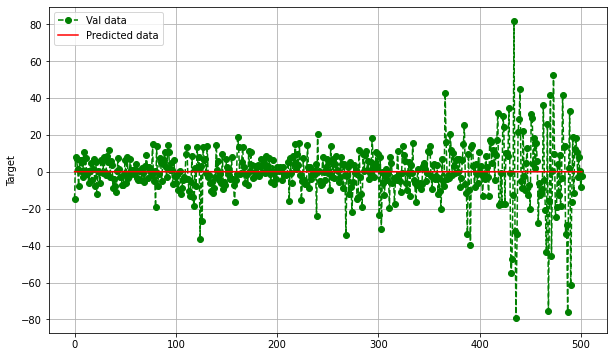

In [47]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel('Target')
#plt.plot(trainS,'green',label='Train data',marker='o',linestyle='dashed')
plt.plot(val['target'].values,'green',label='Val data',marker='o',linestyle='dashed')
#plt.plot(train_df['prediction'],'red',label='Test data')
plt.plot(val['prediction'].values,'red',label='Predicted data')

plt.legend()

# Conclusion


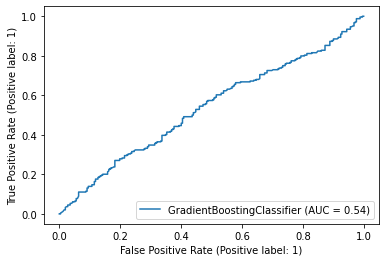

In [57]:
RocCurveDisplay.from_estimator(model,val[sol_col],val['Target'])

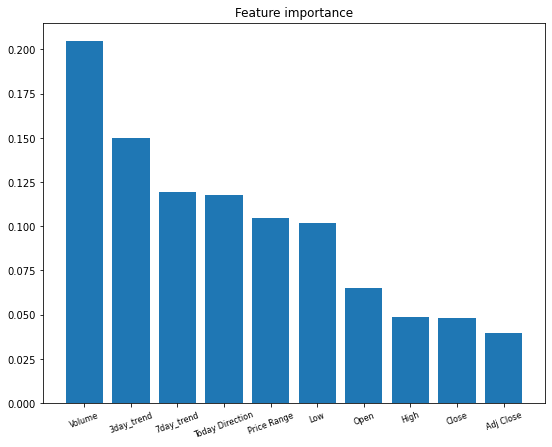

In [61]:
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train[sol_col].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)